In [2]:
# !pip install mlens

In [1]:
from sklearn.datasets import california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from utils import *
from mlens.ensemble import SuperLearner

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

[MLENS] backend: threading


In [2]:
data=california_housing.fetch_california_housing()
x=data.data
y=data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2121)

In [8]:
## Simple Example


Fitting 2 layers
Processing layer-1             done | 00:00:46
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:46

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
MSE -  0.2048351632446552
MAE -  0.3017635351127455


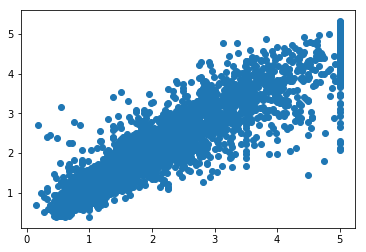

In [12]:
clf1_0 = Ridge(random_state=2112,alpha=0.01)
clf1_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
clf1_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
clf1_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
clf1_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)

level_0 = [clf1_0,clf1_1,clf1_2,clf1_3,clf1_4]

clf2_0 = Ridge(random_state=2112,alpha=0.01)

clf = SuperLearner(folds=3,scorer=mean_squared_error, random_state=2121, verbose=2)
clf.add(level_0)

clf.add_meta(clf2_0)

clf.fit(x_train,y_train)

preds = clf.predict(x_test)
plt_sct(y_test,preds)

In [11]:
print("Fit data:\n%r" % clf.data)

Fit data:
                                      score-m  score-s   ft-m  ft-s  pt-m  pt-s
layer-1  extratreesregressor             0.26     0.01   7.18  0.05  1.07  0.04
layer-1  gradientboostingregressor       0.23     0.00  15.34  0.08  0.04  0.00
layer-1  pipeline                        0.36     0.02  31.29  2.08  0.00  0.00
layer-1  randomforestregressor           0.27     0.01   3.27  0.87  0.26  0.09
layer-1  ridge                           0.54     0.02   0.01  0.00  0.01  0.00




Fitting 3 layers
Processing layer-1             done | 00:00:48
Processing layer-2             done | 00:00:27
Processing layer-3             done | 00:00:00
Fit complete                        | 00:01:16

Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:01
MSE -  0.20297915516460557
MAE -  0.29849031370748613


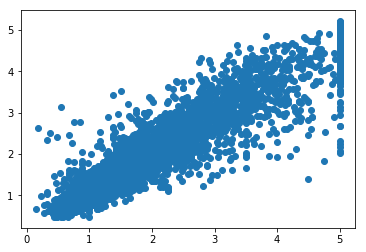

In [75]:
def get_clf(propagate_features=None):
    
    if propagate_features:
        n = len(propagate_features)
        propagate_features_1 = propagate_features
        propagate_features_2 = [i for i in range(n)]
    else:
        propagate_features_1 = propagate_features_2 = None

    clf1_0 = Ridge(random_state=2112,alpha=0.01)
    clf1_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
    clf1_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
    clf1_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
    clf1_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)
    
    level1 = [clf1_0,clf1_1,clf1_2,clf1_3,clf1_4]
    
    clf2_0 = Ridge(random_state=2112,alpha=0.01)
    clf2_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
    clf2_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
    clf2_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
    clf2_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)
    
    leve12 = [clf2_0,clf2_1,clf2_2,clf2_3,clf2_4]
    
    clf3_0 = Ridge(random_state=2112,alpha=0.01)

    clf = SuperLearner(folds=3,scorer=mean_squared_error, random_state=2121, verbose=2)
    clf.add(level1, propagate_features=propagate_features_1)
    clf.add(leve12, propagate_features=propagate_features_2)

    clf.add_meta(clf2_0)
    return clf

clf = get_clf(propagate_features=[1, 3])

clf.fit(x_train,y_train)

preds = clf.predict(x_test)
plt_sct(y_test,preds)

In [71]:
print('First level:')
for i in clf.layer_1.learners:
    if isinstance(i.estimator,RandomForestRegressor) :
        print('   Features_X  - ',x_train.shape[1])
        print('   Features_rf -',list(i.learner)[0].estimator.feature_importances_.shape[0])
print('\n-- - - - - - -- - - - - - -')
print('\nSecond level:')
for i in clf.layer_2.learners:
    if isinstance(i.estimator,RandomForestRegressor) :
        print('   Features_X  - ',x_train.shape[1])
        print('   Features_rf -',list(i.learner)[0].estimator.feature_importances_.shape[0])

First level:
   Features_X  -  8
   Features_rf - 8

-- - - - - - -- - - - - - -

Second level:
   Features_X  -  8
   Features_rf - 7



Fitting 3 layers
Processing layer-1             done | 00:00:49
Processing layer-2             done | 00:00:25
Processing layer-3             done | 00:00:00
Fit complete                        | 00:01:15

Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:01
MSE -  0.2014638570381386
MAE -  0.29713592639055825


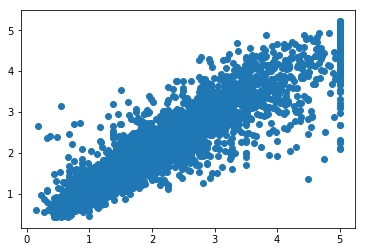

In [76]:
def get_clf(propagate_features=None):
    
    if propagate_features:
        n = len(propagate_features)
        propagate_features_1 = propagate_features
        propagate_features_2 = [i for i in range(n)]
    else:
        propagate_features_1 = propagate_features_2 = None

    clf1_0 = Ridge(random_state=2112,alpha=0.01)
    clf1_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
    clf1_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
    clf1_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
    clf1_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)
    
    level1 = [clf1_0,clf1_1,clf1_2,clf1_3,clf1_4]
    
    clf3_0 = Ridge(random_state=2112,alpha=0.01)

    clf = SuperLearner(folds=3,scorer=mean_squared_error, random_state=2121, verbose=2)
    clf.add(level1, propagate_features=propagate_features_1)
    clf.add(level1, propagate_features=propagate_features_2)

    clf.add_meta(clf2_0)
    return clf

clf = get_clf(propagate_features=[1, 3])

clf.fit(x_train,y_train)

preds = clf.predict(x_test)
plt_sct(y_test,preds)


Fitting 3 layers
Processing layer-1             done | 00:00:37
Processing layer-2             done | 00:00:40
Processing layer-3             done | 00:00:00
Fit complete                        | 00:01:19

Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:01
MSE -  0.19833473425404294
MAE -  0.29642017128464204


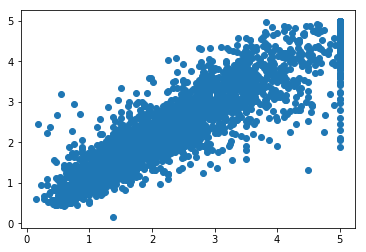

In [112]:
from sklearn.cluster import SpectralClustering
from mlens.ensemble import Subsemble


def get_clf():
    
    propagate_features_1 = list(range(8))
    propagate_features_2 = [1,3]

    clf1_0 = Ridge(random_state=2112,alpha=0.01)
    clf1_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
    clf1_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
    clf1_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
    clf1_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)
    
    level1 = [clf1_0,clf1_1,clf1_2,clf1_3,clf1_4]
    
    clf2_0 = Ridge(random_state=2112,alpha=0.01)
    clf2_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
    clf2_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
    clf2_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
    clf2_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)
    
    level2 = [clf1_0,clf1_1,clf1_2,clf1_3,clf1_4]
    
    clf3_0 = Ridge(random_state=2112,alpha=0.01)
    
    clf = Subsemble(partition_estimator=KMeans(n_clusters=2,random_state=234),
                    scorer=mean_squared_error,folds=3,shuffle=True,random_state=2121,verbose=2)
    clf.add(level1,propagate_features=propagate_features_1)
    clf.add(level2,propagate_features=propagate_features_2)

    clf.add_meta(clf3_0)
    return clf

clf = get_clf()

clf.fit(x_train,y_train)

preds = np.clip(clf.predict(x_test),y_test.min(),y_test.max())
plt_sct(y_test,preds)